In [48]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
import re

In [49]:
df=pd.read_csv('a87698ahfl.csv',encoding="unicode_escape")
df

,UNIQUE ID,DRUGNAME,CONDITION,REVIEW,RATING,SIDE_EFFECTS,Unnamed: 6,EFFECTIVENESS
0,206461,valsartan,left ventricular disfunction,It has no side effect I take it in combinati...,9,'no side effect',NaN,EXTREMELY EFFECTIVE
1,95260,guanfacine,adhd,My son is halfway through his fourth week of ...,8,not mentioned,NaN,HIGH EFFECTIVE
2,92703,lybrel,birth control,I used to take another oral contraceptive wh...,5,not mentioned,NaN,MODERATELY EFFECTIVE
3,138000,ortho evra,birth control,This is my first time using any form of birth...,8,'cramps',NaN,HIGH EFFECTIVE
4,35696,buprenorphine / naloxone,opiate dependence,Suboxone has completely turned my life around...,9,not mentioned,NaN,EXTREMELY EFFECTIVE
...,...,...,...,...,...,...,...,...
5544,213178,ofloxacin,urinary tract infection,The doctor told me it would help within hour...,10,not mentioned,NaN,EXTREMELY EFFECTIVE
5545,150835,sulfamethoxazole / trimethoprim,bronchitis,Great,8,not mentioned,NaN,HIGH EFFECTIVE
5546,164047,ibuprofen,back pain,Relieves pain faster but not quite like a nar...,9,'pain',NaN,EXTREMELY EFFECTIVE
5547,77512,cephalexin,bacterial endocarditis prevention,Reading through these comments I am amazed no...,9,not mentioned,NaN,EXTREMELY EFFECTIVE


In [50]:
df['SIDE_EFFECTS']

0       'no side effect'
1          not mentioned
2          not mentioned
3               'cramps'
4          not mentioned
              ...       
5544       not mentioned
5545       not mentioned
5546              'pain'
5547       not mentioned
5548       not mentioned
Name: SIDE_EFFECTS, Length: 5549, dtype: object

In [51]:
df.head()

,UNIQUE ID,DRUGNAME,CONDITION,REVIEW,RATING,SIDE_EFFECTS,Unnamed: 6,EFFECTIVENESS
0,206461,valsartan,left ventricular disfunction,It has no side effect I take it in combinati...,9,'no side effect',NaN,EXTREMELY EFFECTIVE
1,95260,guanfacine,adhd,My son is halfway through his fourth week of ...,8,not mentioned,NaN,HIGH EFFECTIVE
2,92703,lybrel,birth control,I used to take another oral contraceptive wh...,5,not mentioned,NaN,MODERATELY EFFECTIVE
3,138000,ortho evra,birth control,This is my first time using any form of birth...,8,'cramps',NaN,HIGH EFFECTIVE
4,35696,buprenorphine / naloxone,opiate dependence,Suboxone has completely turned my life around...,9,not mentioned,NaN,EXTREMELY EFFECTIVE


In [52]:
from nltk.util import ngrams
from collections import defaultdict
from collections import OrderedDict
import string
import time
import gc
from math import log10
start_time = time.time()

In [53]:
df

,UNIQUE ID,DRUGNAME,CONDITION,REVIEW,RATING,SIDE_EFFECTS,Unnamed: 6,EFFECTIVENESS
0,206461,valsartan,left ventricular disfunction,It has no side effect I take it in combinati...,9,'no side effect',NaN,EXTREMELY EFFECTIVE
1,95260,guanfacine,adhd,My son is halfway through his fourth week of ...,8,not mentioned,NaN,HIGH EFFECTIVE
2,92703,lybrel,birth control,I used to take another oral contraceptive wh...,5,not mentioned,NaN,MODERATELY EFFECTIVE
3,138000,ortho evra,birth control,This is my first time using any form of birth...,8,'cramps',NaN,HIGH EFFECTIVE
4,35696,buprenorphine / naloxone,opiate dependence,Suboxone has completely turned my life around...,9,not mentioned,NaN,EXTREMELY EFFECTIVE
...,...,...,...,...,...,...,...,...
5544,213178,ofloxacin,urinary tract infection,The doctor told me it would help within hour...,10,not mentioned,NaN,EXTREMELY EFFECTIVE
5545,150835,sulfamethoxazole / trimethoprim,bronchitis,Great,8,not mentioned,NaN,HIGH EFFECTIVE
5546,164047,ibuprofen,back pain,Relieves pain faster but not quite like a nar...,9,'pain',NaN,EXTREMELY EFFECTIVE
5547,77512,cephalexin,bacterial endocarditis prevention,Reading through these comments I am amazed no...,9,not mentioned,NaN,EXTREMELY EFFECTIVE


In [54]:
SIDE_EFFECTS = df.SIDE_EFFECTS.value_counts().sort_values(ascending=False)
SIDE_EFFECTS[:10]

not mentioned        3542
'pain'                703
'stomach'             108
'weight gain'         105
'dizziness'            80
'cramps'               78
'blood pressure'       70
'lbs'                  66
'headache'             63
'pain', 'stomach'      58
Name: SIDE_EFFECTS, dtype: int64

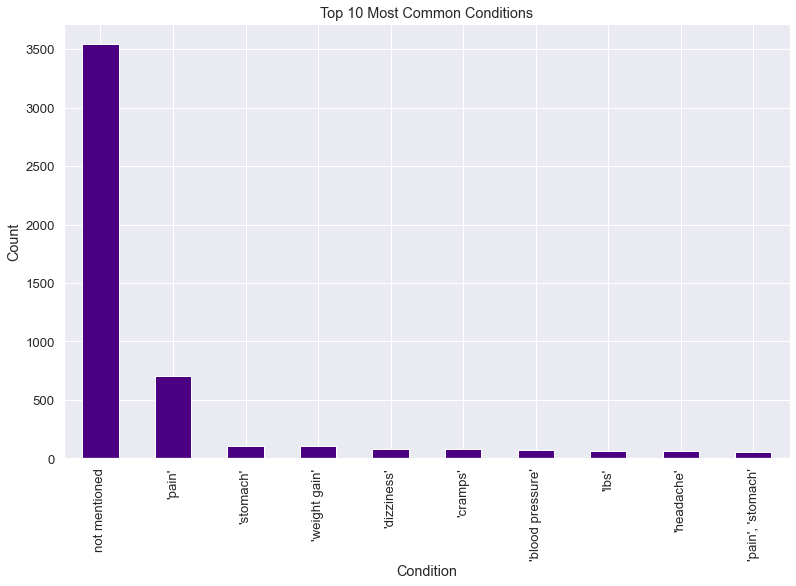

In [55]:
plt.rcParams['figure.figsize'] = [13, 8]
SIDE_EFFECTS[:10].plot(kind='bar',color='indigo')
plt.title('Top 10 Most Common Conditions')
plt.xlabel('Condition')
plt.ylabel('Count');


Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

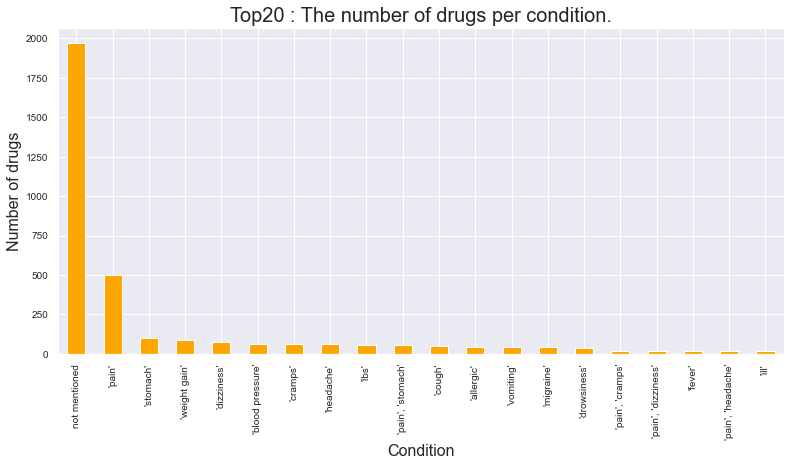

In [56]:
con_dn = df.groupby(['SIDE_EFFECTS'])['DRUGNAME'].nunique().sort_values(ascending=False)
con_dn[0:20].plot(kind="bar", figsize = (13,6), fontsize = 10,color="orange")
plt.xlabel("Condition", fontsize = 16)
plt.ylabel("Number of drugs", fontsize = 16)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)


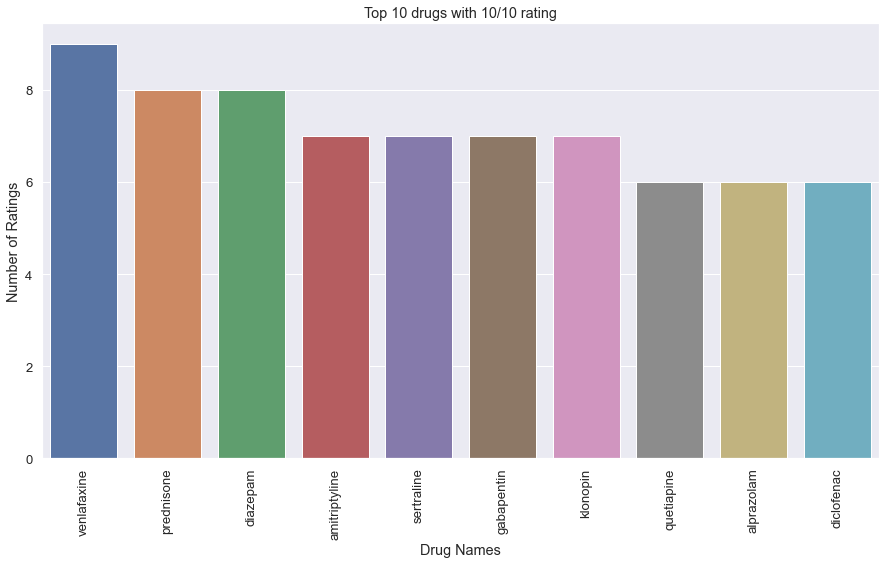

In [57]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

RATING = dict(df.loc[df.RATING == 10, "DRUGNAME"].value_counts())
drugname = list(RATING.keys())
drug_rating = list(RATING.values())

sns_rating = sns.barplot(x = drugname[0:10], y = drug_rating[0:10])

sns_rating.set_title('Top 10 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);


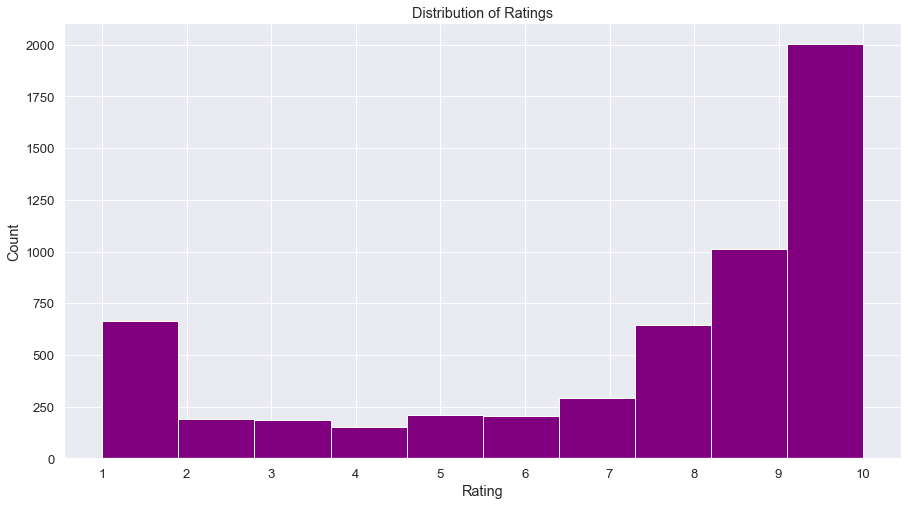

In [58]:
df.RATING.hist(color='purple')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks([i for i in range(1, 11)]);

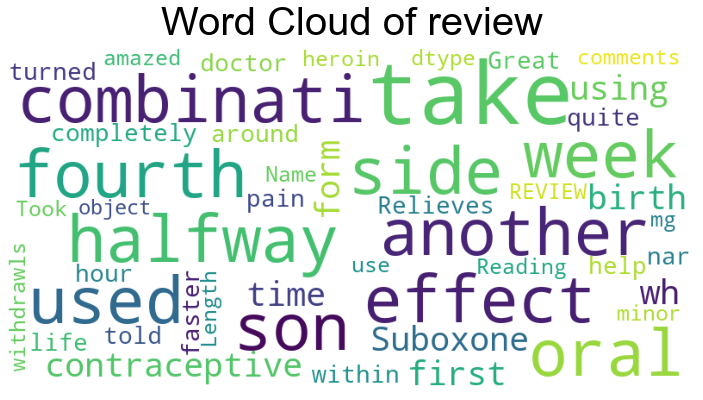

In [59]:
from wordcloud import WordCloud, STOPWORDS


# In[20]:


def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(10,10), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df["REVIEW"], title="Word Cloud of review")

In [60]:
corelation_train=df.corr()
print(corelation_train)


            UNIQUE ID  RATING  Unnamed: 6
UNIQUE ID      1.0000 -0.0116         NaN
RATING        -0.0116  1.0000         NaN
Unnamed: 6        NaN     NaN         NaN


In [61]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
# Create list (cast to array) of compound polarity sentiment scores for reviews
sentiments = []

for i in df.REVIEW:
    sentiments.append(sid.polarity_scores(i).get('compound'))
    
sentiments = np.asarray(sentiments)

In [62]:
df['sentiment'] = pd.Series(data=sentiments)
useful_train = df.reset_index(drop=True)
useful_train.iloc[:15]

,UNIQUE ID,DRUGNAME,CONDITION,REVIEW,RATING,SIDE_EFFECTS,Unnamed: 6,EFFECTIVENESS,sentiment
0,206461,valsartan,left ventricular disfunction,It has no side effect I take it in combinati...,9,'no side effect',NaN,EXTREMELY EFFECTIVE,-0.2960
1,95260,guanfacine,adhd,My son is halfway through his fourth week of ...,8,not mentioned,NaN,HIGH EFFECTIVE,0.9172
2,92703,lybrel,birth control,I used to take another oral contraceptive wh...,5,not mentioned,NaN,MODERATELY EFFECTIVE,0.6387
3,138000,ortho evra,birth control,This is my first time using any form of birth...,8,'cramps',NaN,HIGH EFFECTIVE,0.7184
4,35696,buprenorphine / naloxone,opiate dependence,Suboxone has completely turned my life around...,9,not mentioned,NaN,EXTREMELY EFFECTIVE,0.9403
5,155963,cialis,benign prostatic hyperplasia,nd day on mg started to work with rock hard e...,2,'headache',NaN,NOT EFFECTIVE,-0.1776
6,165907,levonorgestrel,emergency contraception,He pulled out but he cummed a bit in me I t...,1,not mentioned,NaN,NOT EFFECTIVE,0.0000
7,102654,aripiprazole,bipolar disorder,Abilify changed my life There is hope I was...,10,not mentioned,NaN,EXTREMELY EFFECTIVE,-0.9089
8,74811,keppra,epilepsy,I Ve had nothing but problems with the Kepp...,1,not mentioned,NaN,NOT EFFECTIVE,-0.5593
9,48928,ethinyl estradiol / levonorgestrel,birth control,I had been on the pill for many years When m...,8,'weight gain',NaN,HIGH EFFECTIVE,-0.9010


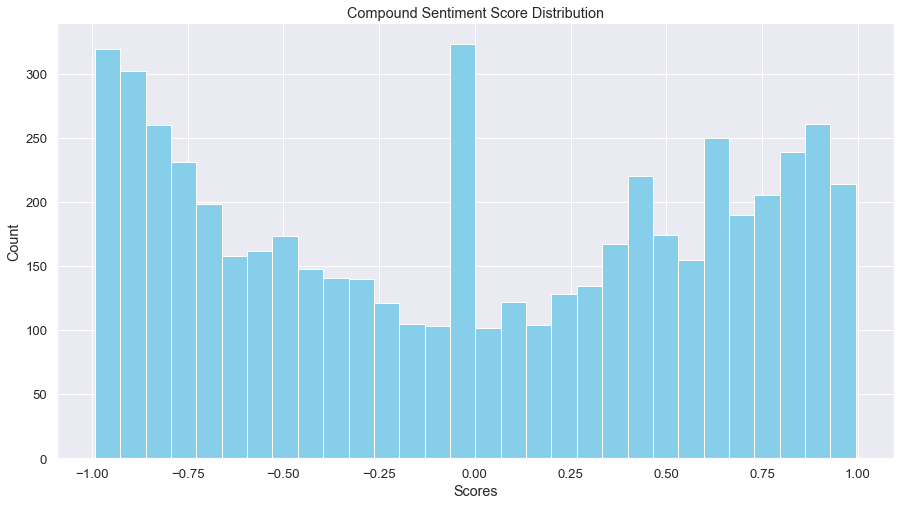

In [63]:
df['sentiment'].hist(color='skyblue', bins=30)
plt.title('Compound Sentiment Score Distribution')
plt.xlabel('Scores')
plt.ylabel('Count');

In [93]:
df['sentiment'].value_counts(bins=4)

(-0.995, -0.495]    1723
(0.498, 0.994]      1588
(-0.495, 0.0012]    1161
(0.0012, 0.498]     1077
Name: sentiment, dtype: int64

In [95]:
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['REVIEW'] = df['REVIEW'].apply(clean_text)

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['REVIEW'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

# import these modules 
from nltk.stem import WordNetLemmatizer 
lt = WordNetLemmatizer() 
df['REVIEW'] = df['REVIEW'].apply(lambda x: " ".join([lt.lemmatize(word) for word in x.split()]))
df['REVIEW'].head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nbs=CountVectorizer(max_features=5548)
X = nbs.fit_transform(df.REVIEW)
y=df.SIDE_EFFECTS
